<a href="https://colab.research.google.com/github/ssanudo/ProcesamDigImagTP/blob/main/TP3/PDI_TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP3_Procesamiento Digital de Imágenes
##De: Silvana Sañudo

#**Aritmética de píxeles**
Las operaciones entre imágenes (*ImA* e *ImB*) a trabajar son:
* **Cuasi Suma**
  *   Cierre Clampeado: Truncando en 255. \begin{equation}
                        ImC_{RGB}=ImA_{RGB}+ImB_{RGB}
                        \end{equation}
        
  *   Cierre  Promediado: \begin{equation}
                         ImC_{RGB}= \frac{\left( ImA_{RGB}+ImB_{RGB} \right)}{2}
                          \end{equation}
  *   Desde YIQ, Clamping: \begin{equation} \mathrm{Y}_{C}=\mathrm{Y}_{A}+\mathrm{Y}_{B}\end{equation}
\begin{equation} \mathrm{I}_{C}=\frac{\mathrm{Y}_{A}*\mathrm{I}_{A}+\mathrm{Y}_{B}*\mathrm{I}_{B} }{\mathrm{Y}_{A}+\mathrm{Y}_{B}}\end{equation}
\begin{equation} \mathrm{Q}_{C}=\frac{\mathrm{Y}_{A}*\mathrm{Q}_{A}+\mathrm{Y}_{B}*\mathrm{Q}_{B} }{\mathrm{Y}_{A}+\mathrm{Y}_{B}}\end{equation}
  *   Desde YIQ, Promedio:\begin{equation} \mathrm{Y}_{C}=\frac{\mathrm{Y}_{A}+\mathrm{Y}_{B}}{2}\end{equation}
\begin{equation} \mathrm{I}_{C}=\frac{\mathrm{I}_{A}+\mathrm{I}_{B} }{2}\end{equation}
\begin{equation} \mathrm{Q}_{C}=\frac{\mathrm{Q}_{A}+\mathrm{Q}_{B} }{2}\end{equation}
  *   If Ligther:   \begin{equation} \text{IF}\left( \mathrm{Y}_{A}\gt\mathrm{Y}_{B} \right) \to \left\{\mathrm{Y}_{C}=\mathrm{Y}_{A}, \mathrm{I}_{C}=\mathrm{I}_{A} , \mathrm{Q}_{C}=\mathrm{Q}_{A} \right\}\end{equation}

\begin{equation} \text{ELSE} \left\{\mathrm{Y}_{C}=\mathrm{Y}_{B}, \mathrm{I}_{C}=\mathrm{I}_{B} , \mathrm{Q}_{C}=\mathrm{Q}_{B} \right\}\end{equation}


*   **Cuasi Resta**
  *   Cierre Clampeado:Llevando valores negativos a cero.\begin{equation}
                       ImC_{RGB}= ImA_{RGB}-ImB_{RGB}
                        \end{equation}
  *   Cierre  Promediado:\begin{equation}
                    ImC_{RGB}=\frac{\left( ImA_{RGB}-ImB_{RGB} \right)}{2}+127
                          \end{equation}
  *   Desde YIQ, Clamping: \begin{equation} \mathrm{Y}_{C}=\mathrm{Y}_{A}-\mathrm{Y}_{B}\end{equation}
\begin{equation} \mathrm{I}_{C}=\frac{\mathrm{Y}_{A}*\mathrm{I}_{A}-\mathrm{Y}_{B}*\mathrm{I}_{B} }{\mathrm{Y}_{A}+\mathrm{Y}_{B}}\end{equation}
\begin{equation} \mathrm{Q}_{C}=\frac{\mathrm{Y}_{A}*\mathrm{Q}_{A}-\mathrm{Y}_{B}*\mathrm{Q}_{B} }{\mathrm{Y}_{A}+\mathrm{Y}_{B}}\end{equation}

  *   If Darker:  \begin{equation} \text{IF}\left( \mathrm{Y}_{A}\lt\mathrm{Y}_{B} \right) \to \left\{\mathrm{Y}_{C}=\mathrm{Y}_{A}, \mathrm{I}_{C}=\mathrm{I}_{A} , \mathrm{Q}_{C}=\mathrm{Q}_{A} \right\}\end{equation}

\begin{equation} \text{ELSE} \left\{\mathrm{Y}_{C}=\mathrm{Y}_{B}, \mathrm{I}_{C}=\mathrm{I}_{B} , \mathrm{Q}_{C}=\mathrm{Q}_{B} \right\}\end{equation}








#Dificultades:
* Aparece el siguiente cartel: 
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). No sé como corregirlo.
* No llegué a consultar y no la pude sacar de la teoría a la suma y resta promediada en YIQ, la suma la evalué pero no sé si es la forma correcta.  

#Trabajo Práctico Nro. 3


#Consigna

La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:

En espacio RGB:

* Sumas y restas: clampeada y promediada

Es espacio YIQ:
* Sumas y Restas: clampeada, promediada, if-ligther, if-darker

El resultado de estas se debe guardar como una nueva imagen.
Se deben mostrar los resultados de todas las operaciones mencionadas.
Nota: leer cuidadosamente en la teoría las pautas que debe tener cada una de estas operaciones. Las operaciones deben ser realizadas como funciones desarrolladas por ustedes NO mediante funciones de librerías que ya las realicen.

**Librerías a utilzar**

In [1]:

#Librerías
import numpy as np
from PIL import Image
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**Funciones a utilizar:**

In [61]:



def ImgShapeShow(im):#muestra datos de forma del arreglo obtenido de las imágenes
  print('Tamaño del arreglo',im.shape, 'donde', im.shape[0], 'x',im.shape[1],'es el tamaño de la imágen en píxeles, y ',im.shape[2], 'es el valor RGB de cada uno de dichos píxeles' )
  

def open_img(file_path):#Abre la imágen, y muestra datos de forma
  im=imageio.imread(file_path)
  ImgShapeShow(im)
  if (im.shape[2]==4):im=im[:,:,0:3]
  im = im.astype(np.int)
  return im

def save_img(im,imgName): #guarda la imagen con el nombre imgName
  imgName=imgName+'.png'
  imageio.imwrite(imgName, im.astype(np.uint8))

def normalizeRGB(x):return np.array((x - 0) / (255))
#Normaliza [0-255] RGB de la imagen en el rango [0,1], x es el arreglo de RGB de la img.

def normalizeRGB2(x):return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))
#Normaliza el valor RGB de la imagen en el rango [0,1], x es el arreglo de RGB de la img.

#Defino las matrices de conversión, de RGB a YIQ y viseversa.
rgb2yiq=np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
#print(rgb2yiq)
yiq2rgb=np.array([[1,0.9663,0.621],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
#print(yiq2rgb)


def RGB2YIQ(im): #función que convierte de RGB a YIQ de una imágen
  #Normalizo valores RGB de 0-255 a 0-1
  imNorm=normalizeRGB(im.copy())
  #Obtengo valores de YIQ 
  im_YIQ=np.dot(imNorm, rgb2yiq.T)
  return im_YIQ

def ClampingSumYIQ(imA,imB): #función que realiza la suma clampeada imA+imB
  #Obtengo valores de YIQ 
  imA_YIQ=RGB2YIQ(imA)
  imB_YIQ=RGB2YIQ(imB)
  YIQc=imA_YIQ.copy()
  #Suma
  YIQc[:,:,0]=np.add(imA_YIQ[:,:,0],imB_YIQ[:,:,0])
  YIQc[:,:,1]=np.divide(np.add(np.multiply(imA_YIQ[:,:,0],imA_YIQ[:,:,1]),np.multiply(imB_YIQ[:,:,0],imB_YIQ[:,:,1])),np.add(imA_YIQ[:,:,0],imB_YIQ[:,:,0]))
  YIQc[:,:,2]=np.divide(np.add(np.multiply(imA_YIQ[:,:,0],imA_YIQ[:,:,2]),np.multiply(imB_YIQ[:,:,0],imB_YIQ[:,:,2])),np.add(imA_YIQ[:,:,0],imB_YIQ[:,:,0]))
  #Fuerzo los valores fuera de rango
  YIQc[:,:,0][YIQc[:,:,0]>=1]=1
  YIQc[:,:,1][YIQc[:,:,1]<-0.5957]=-0.5957
  YIQc[:,:,1][YIQc[:,:,1]>0.5957]=0.5957
  YIQc[:,:,2][YIQc[:,:,2]<-0.5226]=-0.5226
  YIQc[:,:,2][YIQc[:,:,2]>0.5226]=0.5226
  #print('Arr_YIQmod',Arr_YIQmod)
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  
  ImC=YIQcFin.astype(np.int)
  return ImC


def PromSumYIQ(imA,imB): #función que realiza la suma clampeada imA+imB
  #Obtengo valores de YIQ 
  imA_YIQ=RGB2YIQ(imA)
  imB_YIQ=RGB2YIQ(imB)
  YIQc=imA_YIQ.copy()
  #Suma
  YIQc[:,:,0]=np.divide(np.add(imA_YIQ[:,:,0],imB_YIQ[:,:,0]),2)
  YIQc[:,:,1]=np.divide(np.add(imA_YIQ[:,:,1],imB_YIQ[:,:,1]),2)
  YIQc[:,:,2]=np.divide(np.add(imA_YIQ[:,:,2],imB_YIQ[:,:,2]),2)
  #Fuerzo los valores fuera de rango
  YIQc[:,:,0][YIQc[:,:,0]>=1]=1
  YIQc[:,:,1][YIQc[:,:,1]<-0.5957]=-0.5957
  YIQc[:,:,1][YIQc[:,:,1]>0.5957]=0.5957
  YIQc[:,:,2][YIQc[:,:,2]<-0.5226]=-0.5226
  YIQc[:,:,2][YIQc[:,:,2]>0.5226]=0.5226
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  
  ImC=YIQcFin.astype(np.int)
  return ImC


def ClampingSubtractYIQ(imA,imB): #función que resta dos imágenes en YIQ.
  #Obtengo valores de YIQ 
  imA_YIQ=RGB2YIQ(imA)
  imB_YIQ=RGB2YIQ(imB)
  YIQc=imA_YIQ.copy()
  #Ecuación de resta Clampeada en YIQ
  YIQc[:,:,0]=np.subtract(imA_YIQ[:,:,0],imB_YIQ[:,:,0])
  YIQc[:,:,1]=np.divide(np.subtract(np.multiply(imA_YIQ[:,:,0],imA_YIQ[:,:,1]),np.multiply(imB_YIQ[:,:,0],imB_YIQ[:,:,1])),np.add(imA_YIQ[:,:,0],imB_YIQ[:,:,0]))
  YIQc[:,:,2]=np.divide(np.subtract(np.multiply(imA_YIQ[:,:,0],imA_YIQ[:,:,2]),np.multiply(imB_YIQ[:,:,0],imB_YIQ[:,:,2])),np.add(imA_YIQ[:,:,0],imB_YIQ[:,:,0]))
  #Fuerzo los valores fuera de rango
  YIQc[:,:,0][YIQc[:,:,0]>=1]=1
  YIQc[:,:,1][YIQc[:,:,1]<-0.5957]=-0.5957
  YIQc[:,:,1][YIQc[:,:,1]>0.5957]=0.5957
  YIQc[:,:,2][YIQc[:,:,2]<-0.5226]=-0.5226
  YIQc[:,:,2][YIQc[:,:,2]>0.5226]=0.5226
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  
  ImC=YIQcFin.astype(np.int)
  return ImC

def IfLighterYIQ(imA,imB): #función que se queda con los valores de YIQ  con mayor luminancia de cada imágen para armar la imágen de salida.
  #Obtengo valores de YIQ 
  imA_YIQ=RGB2YIQ(imA)
  imB_YIQ=RGB2YIQ(imB)
  YIQc=imA_YIQ.copy()
  #Guardo en YIQc los valores con mayor luminancia de cada imágen
  imA_YIQ[imA_YIQ[:,:,0]<imB_YIQ[:,:,0]]=0
  imB_YIQ[YIQc[:,:,0]>imB_YIQ[:,:,0]]=0
  YIQc=np.add(imA_YIQ,imB_YIQ)
  #Fuerzo los valores fuera de rango
  YIQc[:,:,0][YIQc[:,:,0]>=1]=1
  YIQc[:,:,1][YIQc[:,:,1]<-0.5957]=-0.5957
  YIQc[:,:,1][YIQc[:,:,1]>0.5957]=0.5957
  YIQc[:,:,2][YIQc[:,:,2]<-0.5226]=-0.5226
  YIQc[:,:,2][YIQc[:,:,2]>0.5226]=0.5226
  #print('Arr_YIQmod',Arr_YIQmod)
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  
  ImC=YIQcFin.astype(np.int)
  return ImC


def IfDarkerYIQ(imA,imB): #función que se queda con los valores de YIQ  con menor luminancia de cada imágen para armar la imágen de salida.
  #Obtengo valores de YIQ 
  imA_YIQ=RGB2YIQ(imA)
  imB_YIQ=RGB2YIQ(imB)
  YIQc=imA_YIQ.copy()
  #Guardo en YIQc los valores con menor luminancia de cada imágen
  imA_YIQ[imA_YIQ[:,:,0]>imB_YIQ[:,:,0]]=0 
  imB_YIQ[YIQc[:,:,0]<imB_YIQ[:,:,0]]=0  
  YIQc=np.add(imA_YIQ,imB_YIQ)
  #Fuerzo los valores fuera de rango
  YIQc[:,:,0][YIQc[:,:,0]>=1]=1
  YIQc[:,:,1][YIQc[:,:,1]<-0.5957]=-0.5957
  YIQc[:,:,1][YIQc[:,:,1]>0.5957]=0.5957
  YIQc[:,:,2][YIQc[:,:,2]<-0.5226]=-0.5226
  YIQc[:,:,2][YIQc[:,:,2]>0.5226]=0.5226
  #Vuelvo a RGB normalizado
  YIQcFin=np.dot(YIQc, yiq2rgb.T)
  #Desnormalizo
  YIQcFin=YIQcFin*255
  ImC=YIQcFin.astype(np.int)
  return ImC


def ABoperated(operation, mode,ImgA,ImgB): #Fcn que permite llevar a cabo las operaciones entre imágenes requeridas en la interfaz
  if (operation=="Suma"):
    if (mode=="Clamping"):
      imC=np.add(ImgA,ImgB)
      imC[:,:,0][imC[:,:,0]>255]=255
      imC[:,:,1][imC[:,:,1]>255]=255
      imC[:,:,2][imC[:,:,2]>255]=255
      imC=imC.astype(np.int)
    elif (mode=="Promedio"):
      imC=np.multiply(np.add(ImgA,ImgB),0.5)
      imC=imC.astype(np.int)
    elif (mode=='YIQ Clamping'):
      imC=ClampingSumYIQ(imA,imB)
    elif (mode=='YIQ Promedio'):
      imC=PromSumYIQ(imA,imB)
    else:
      print('aca va nueva fcn')
      
  elif (operation=="Resta"):
    if (mode=="Clamping"):
      imC=np.subtract(ImgA,ImgB)
      imC[:,:,0][imC[:,:,0]<0]=0
      imC[:,:,1][imC[:,:,1]<0]=0
      imC[:,:,2][imC[:,:,2]<0]=0
      imC=imC.astype(np.int)
    elif (mode=="Promedio"):
      imC=np.multiply(np.subtract(ImgA,ImgB),0.5)+127
      imC=imC.astype(np.int)
    elif (mode=='YIQ Clamping'):
      imC=ClampingSubtractYIQ(imA,imB)
    elif (mode=="Abs"):
      imC=np.absolute(np.subtract(ImgA,ImgB))
      imC=imC.astype(np.int)
    else:
      print('aca va nueva fcn')
  elif (operation=='IfLigther'):
    imC=IfLighterYIQ(imA,imB)
  elif (operation=='IfDarker'):
    imC=IfDarkerYIQ(imA,imB)
  else:
      print('aca va nueva fcn')
  
  return imC

#**Espacio YIQ. Primera Parte**

A continuación, a partir de la conversión del RGB de la imágen a YIQ, es posible variar su luminancia con alfa, y cromaticidad con beta.

Image A: 
Tamaño del arreglo (300, 532, 4) donde 300 x 532 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles
Image B: 
Tamaño del arreglo (300, 532, 4) donde 300 x 532 es el tamaño de la imágen en píxeles, y  4 es el valor RGB de cada uno de dichos píxeles


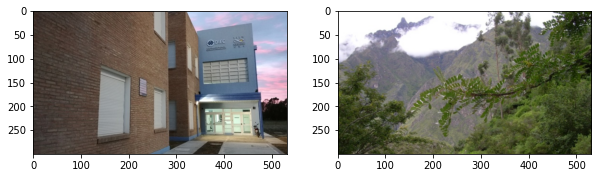

In [58]:
#
#@title # Operaciones de Suma y Resta con las figuras A y B (Deben ser de igual tamaño.)

file_pathA = '/content/ImA.png'

file_pathB = '/content/ImB.png'

fig = plt.figure(figsize=(10, 20))
fig.add_subplot(1, 2, 1)
#Abro la img en PNG como un arreglo
print('Image A: ')

imA =open_img(file_pathA)

plt.imshow(imA)
print('Image B: ')
fig.add_subplot(1, 2, 2)
#Abro la img en PNG como un arreglo
imB =open_img(file_pathB)

plt.imshow(imB)


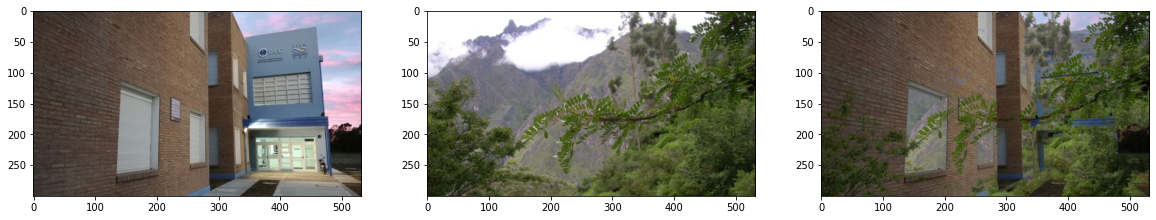

In [59]:
#@title ## Cambio los factores de Luminancia y Crominancia en el espacio YIQ de una imágen
#@markdown  Seleccione los valores a modificar:

Operacion = 'IfDarker' #@param ["'Suma'", "'Resta'","'IfLigther'","'IfDarker'"] {type:"raw"}
Modo = 'YIQ Promedio' #@param ["'Clamping'", "'Promedio'","'YIQ Clamping'","'YIQ Promedio'"] {type:"raw"}

ImMod=ABoperated(Operacion, Modo,imA,imB)
# Save image
imgName='imModified_'+Operacion+'_'+Modo+'.png'
imageio.imwrite(imgName, ImMod.astype(np.uint8))


fig = plt.figure(figsize=(20, 40))
fig.add_subplot(1, 3, 1)
plt.imshow(imA)
fig.add_subplot(1, 3, 2)
plt.imshow(imB)
fig.add_subplot(1, 3, 3)
plt.imshow(ImMod)
plt.show()
if ((Operacion!='Suma') & (Operacion!='IfLigther')& (Operacion!='IfDarker')):    
  ImMod2=ABoperated(Operacion, Modo,imB,imA)
  fig = plt.figure(figsize=(20, 40))
  fig.add_subplot(1, 3, 1)
  plt.imshow(imB)
  fig.add_subplot(1, 3, 2)
  plt.imshow(imA)
  fig.add_subplot(1, 3, 3)
  plt.imshow(ImMod2)
  plt.show()

#Análisis
Para poder realizar un análisis de los resultados, genero las operaciones y muestro los resultados obtenidos en cada una. 

Suma, Imágen A + Imágen B


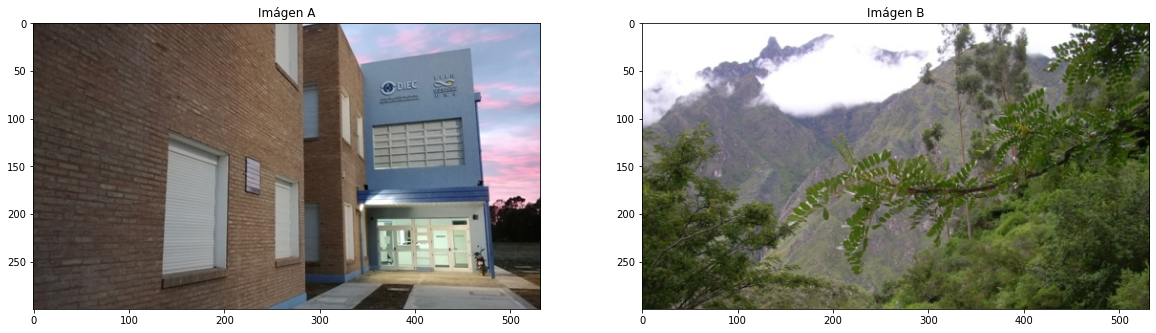

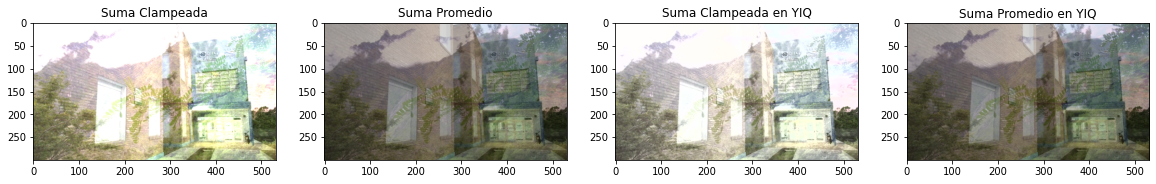

Resta, Imágen A - Imágen B


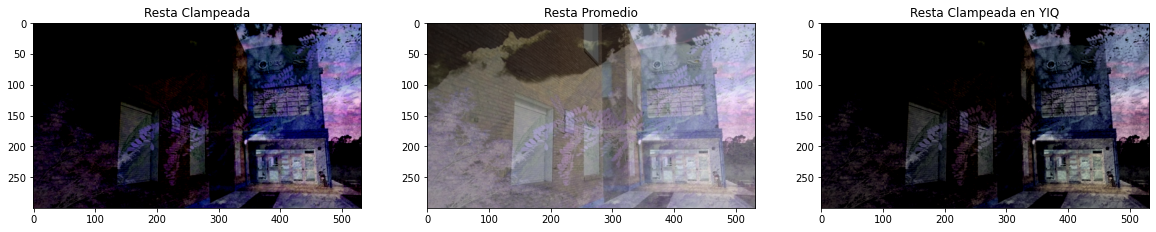

If Ligther e If Darker


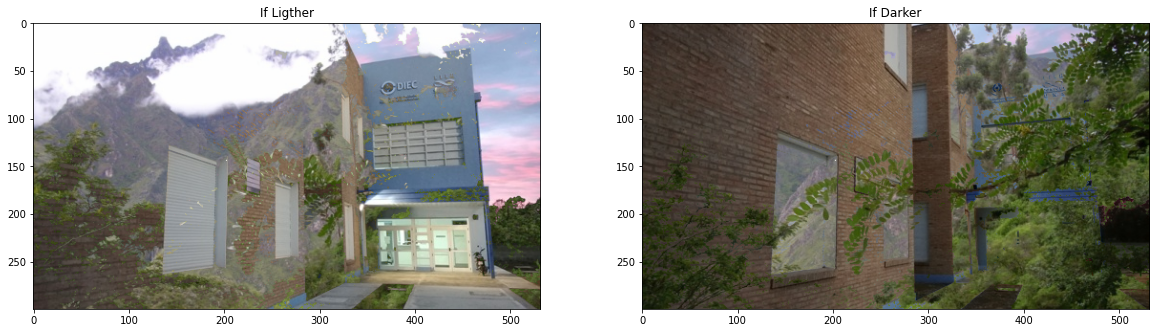

In [60]:

fig = plt.figure(figsize=(20, 40))
fig.add_subplot(1, 2, 1)
column='Imágen A'
plt.title(column)
plt.imshow(imA)
fig.add_subplot(1, 2, 2)
column='Imágen B'
plt.title(column)
plt.imshow(imB)
print('Suma, Imágen A + Imágen B')

ImSCl=ABoperated('Suma', 'Clamping',imA,imB)
ImSPr=ABoperated('Suma', 'Promedio',imA,imB)
ImSYIQCl=ABoperated('Suma', 'YIQ Clamping',imA,imB)
ImSYIQPr=ABoperated('Suma', 'YIQ Promedio',imA,imB)
fig = plt.figure(figsize=(20, 40))
fig.add_subplot(1, 4, 1)

plt.imshow(ImSCl)
column='Suma Clampeada'
plt.title(column)
fig.add_subplot(1, 4, 2)

plt.imshow(ImSPr)
column='Suma Promedio'
plt.title(column)
fig.add_subplot(1, 4, 3)

plt.imshow(ImSYIQCl)
column='Suma Clampeada en YIQ'
plt.title(column)

fig.add_subplot(1, 4,4)

plt.imshow(ImSYIQPr)
column='Suma Promedio en YIQ'
plt.title(column)
plt.show()

print('Resta, Imágen A - Imágen B')
ImRCl=ABoperated('Resta', 'Clamping',imA,imB)
ImRPr=ABoperated('Resta', 'Promedio',imA,imB)
ImRYIQCl=ABoperated('Resta', 'YIQ Clamping',imA,imB)
fig = plt.figure(figsize=(20, 40))
fig.add_subplot(1, 3, 1)

plt.imshow(ImRCl)
column='Resta Clampeada'
plt.title(column)
fig.add_subplot(1, 3, 2)

plt.imshow(ImRPr)
column='Resta Promedio'
plt.title(column)
fig.add_subplot(1, 3, 3)

plt.imshow(ImRYIQCl)
column='Resta Clampeada en YIQ'
plt.title(column)
plt.show()

print('If Ligther e If Darker')
ImIL=ABoperated('IfLigther', '',imA,imB)
ImID=ABoperated('IfDarker', '',imA,imB)

fig = plt.figure(figsize=(20, 40))
fig.add_subplot(1, 2, 1)

plt.imshow(ImIL)
column='If Ligther'
plt.title(column)
fig.add_subplot(1, 2, 2)

plt.imshow(ImID)
column='If Darker'
plt.title(column)
plt.show()



En las restas, podemos ver el efecto de cambio de color en la resta clampeada, y que la resta promedio queda mas oscura que ambas imágenes. 
Se ve que la suma promedio, y promedio en YIQ, son iguales, como se dijo en teoría.
En If Lighter e If Darker se aprecian claramente los píxeles seleccionados en base a mayor y menor luminancia en cada caso. Incluso comparando ambas mágenes se ve que los que aparecen en una son los complementarios a los que aparecen en la otra.
En la suma clampeada se genera una deriva cromática por la saturación de los colores en 255. En la suma promedio se aprecia una mayor oscuridad respecto de las originales.
Se puede ver que la suma clampeada y la suma en YIQ clampeada se aprecian casi sin diferencias, apenas se puede ver que la imágen de suma en YIQ es mas luminosa y no pierde crominancia. Para ver que realmente son diferentes, genero las imágenes a continuación:

Comparo Sumas


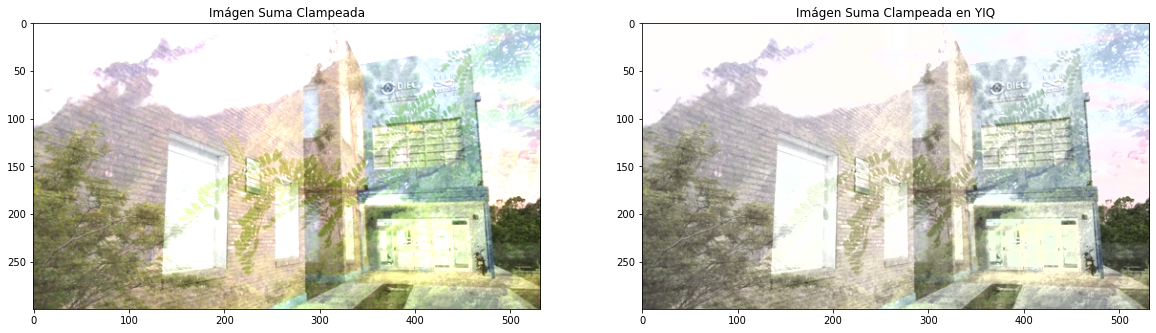

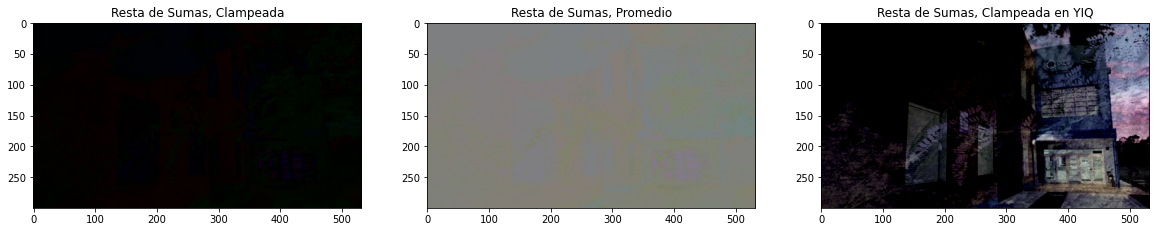

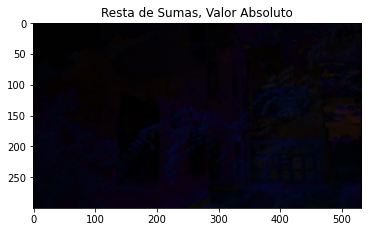

In [32]:
fig = plt.figure(figsize=(20, 40))
fig.add_subplot(1, 2, 1)
column='Imágen Suma Clampeada'
plt.title(column)
plt.imshow(ImSCl)
fig.add_subplot(1, 2, 2)
column='Imágen Suma Clampeada en YIQ'
plt.title(column)
plt.imshow(ImSYIQCl)
fig = plt.figure(figsize=(20, 40))
ImRdeSums_Cl=ABoperated('Resta', 'Clamping',ImSCl,ImSYIQCl)
fig.add_subplot(1, 3,1)
column='Resta de Sumas, Clampeada'
plt.title(column)
plt.imshow(ImRdeSums_Cl)

ImRdeSums_Prom=ABoperated('Resta', 'Promedio',ImSCl,ImSYIQCl)
fig.add_subplot(1, 3,2)
column='Resta de Sumas, Promedio'
plt.title(column)
plt.imshow(ImRdeSums_Prom)

ImRdeSums_YIQCl=ABoperated('Resta','YIQ Clamping',ImSCl,ImSYIQCl)
fig.add_subplot(1, 3,3)
column='Resta de Sumas, Clampeada en YIQ'
plt.title(column)
plt.imshow(ImRdeSums_YIQCl)
print('Comparo Sumas')
fig = plt.figure(figsize=(20, 40))
ImRdeSums_Abs=ABoperated('Resta','Abs',ImSCl,ImSYIQCl)
fig.add_subplot(1, 3,3)
column='Resta de Sumas, Valor Absoluto'
plt.title(column)
plt.imshow(ImRdeSums_Abs)


In [ ]:
En este caso, cuando tenemos imágenes muy similares, podemos observar las diferencias en la resta. En el primer caso vemos que no hay diferencia entre las imágenes, o una diferencia constante, debido al recorte de los valores negativos.
En el caso de la resta clampeada se puede apreciar la diferencia, incluso generé una función cuyo resultado es el valor absoluto de la resta, para poder observar la información que estoy perdiendo al truncar en la resta clampeada.